In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist

### Pre-processing of data

Shape of training data set:  (60000, 28, 28) (60000,)

Shape of testing data set:  (10000, 28, 28) (10000,)

Ratio of test size:  0.17

Number of input features:  784

Number of unique labels:  10


Before reshape, the shape of training images:  (60000, 28, 28)

After reshape, the shape of training images:  (60000, 784)


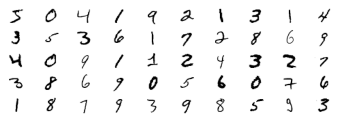

In [3]:
(X_train_0,y_train_0),(X_test_0,y_test_0) = mnist.load_data()
print("Shape of training data set: ", X_train_0.shape, y_train_0.shape)
print()
print("Shape of testing data set: ", X_test_0.shape, y_test_0.shape)
print()
print("Ratio of test size: ", round((len(X_test_0) / len(X_train_0)),2))

number_of_features = X_train_0[0].shape[0] * X_train_0[0].shape[1]
unique_labels = len(np.unique(y_train_0))

print()
print("Number of input features: ", number_of_features)
print()
print("Number of unique labels: ", unique_labels)
print()
for i in range(50):
    ax = plt.subplot(10,10,i+1)
    ax.axis('off')
    plt.imshow(X_train_0[i], cmap='Greys')

print()
print("Before reshape, the shape of training images: ", X_train_0.shape)
# In the images, there are 6000 of 28x28 matrices, now in order to change it to vector, we will make 28x28 matrix to a single vector of (28*28) rows
X_train = X_train_0.reshape(len(X_train_0), number_of_features)
X_test = X_test_0.reshape(len(X_test_0), number_of_features)
print()
print("After reshape, the shape of training images: ", X_train.shape)

# Create 1-hot encoded vectors using to_categorical

y_train = keras.utils.to_categorical(y_train_0, num_classes = unique_labels )
y_test = keras.utils.to_categorical(y_test_0, num_classes = unique_labels )




### Plot functions

In [9]:
def model_accuracy_plot(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(['training_data', 'validation_data'], loc='best')
    plt.show
    
def model_loss_plot(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(['training_data', 'validation_data'], loc='best')
    plt.show()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 30)                23550     
_________________________________________________________________
dense_20 (Dense)             (None, 10)                310       
Total params: 23,860
Trainable params: 23,860
Non-trainable params: 0
_________________________________________________________________
None


10000/10000 [==============================] - 0s 23us/step


Testing data Loss:  0.25

Testing data Accuracy:  0.93


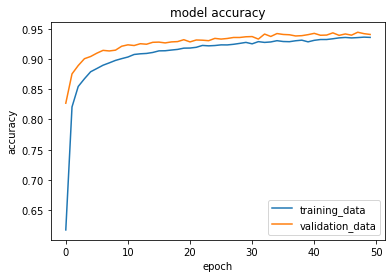

In [24]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
# first layer with input features and one hidden layer
model.add(Dense(units = 30,
                activation = 'sigmoid',
                input_shape=(number_of_features, )))

model.add(Dense(units = unique_labels,
                activation = 'softmax'))
print(model.summary())
print()

model.compile(optimizer="sgd", 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

history = model.fit(x = X_train,
                    y = y_train,
                    batch_size= 150,
                    epochs=50,
                    verbose=0,
                    validation_split=0.1)

print()
loss, accuracy = model.evaluate(x = X_test,
                                y = y_test)

print()
model_accuracy_plot(history)
print()
print('Testing data Loss: ', round(loss, 2))
print()
print('Testing data Accuracy: ', round(accuracy, 2))

### Model with less neurons in hidden layer

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 5)                 3925      
_________________________________________________________________
dense_22 (Dense)             (None, 10)                60        
Total params: 3,985
Trainable params: 3,985
Non-trainable params: 0
_________________________________________________________________
None


10000/10000 [==============================] - 0s 30us/step


Testing data Loss:  0.78

Testing data Accuracy:  0.81


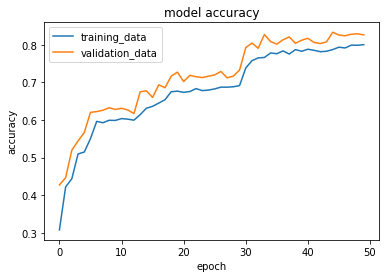

In [25]:
model = Sequential()
# first layer with input features and one hidden layer
model.add(Dense(units = 5,
                activation = 'sigmoid',
                input_shape=(number_of_features, )))

model.add(Dense(units = unique_labels,
                activation = 'softmax'))
print(model.summary())
print()

model.compile(optimizer="sgd", 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

history = model.fit(x = X_train,
                    y = y_train,
                    batch_size= 150,
                    epochs=50,
                    verbose=0,
                    validation_split=0.1)

print()
loss, accuracy = model.evaluate(x = X_test,
                                y = y_test)

print()
model_accuracy_plot(history)
print()
print('Testing data Loss: ', round(loss, 2))
print()
print('Testing data Accuracy: ', round(accuracy, 2))

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 1)                 785       
_________________________________________________________________
dense_24 (Dense)             (None, 10)                20        
Total params: 805
Trainable params: 805
Non-trainable params: 0
_________________________________________________________________
None


10000/10000 [==============================] - 0s 15us/step


Testing data Loss:  1.89

Testing data Accuracy:  0.21


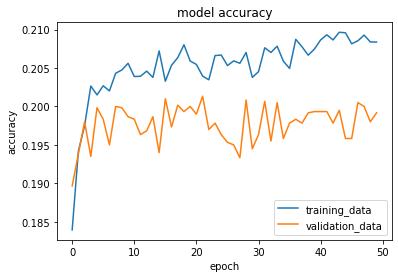

In [26]:
model = Sequential()
# first layer with input features and one hidden layer
model.add(Dense(units = 1,
                activation = 'sigmoid',
                input_shape=(number_of_features, )))

model.add(Dense(units = unique_labels,
                activation = 'softmax'))
print(model.summary())
print()

model.compile(optimizer="sgd", 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

history = model.fit(x = X_train,
                    y = y_train,
                    batch_size= 150,
                    epochs=50,
                    verbose=0,
                    validation_split=0.1)

print()
loss, accuracy = model.evaluate(x = X_test,
                                y = y_test)

print()
model_accuracy_plot(history)
print()
print('Testing data Loss: ', round(loss, 2))
print()
print('Testing data Accuracy: ', round(accuracy, 2))



Increasing the number of parameters can often yield better results, in this case we have to train for fewer epochs to achieve a higher accuracy.


Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 250)               196250    
_________________________________________________________________
dense_26 (Dense)             (None, 10)                2510      
Total params: 198,760
Trainable params: 198,760
Non-trainable params: 0
_________________________________________________________________
None


10000/10000 [==============================] - 0s 28us/step


Testing data Loss:  0.23

Testing data Accuracy:  0.94


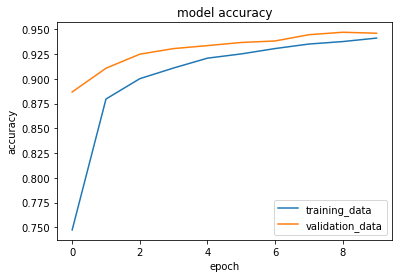

In [27]:
model = Sequential()
# first layer with input features and one hidden layer
model.add(Dense(units = 250,
                activation = 'sigmoid',
                input_shape=(number_of_features, )))

model.add(Dense(units = unique_labels,
                activation = 'softmax'))
print(model.summary())
print()

model.compile(optimizer="sgd", 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

history = model.fit(x = X_train,
                    y = y_train,
                    batch_size= 150,
                    epochs=10,
                    verbose=0,
                    validation_split=0.1)

print()
loss, accuracy = model.evaluate(x = X_test,
                                y = y_test)

print()
model_accuracy_plot(history)
print()
print('Testing data Loss: ', round(loss, 2))
print()
print('Testing data Accuracy: ', round(accuracy, 2))

* more number of neurons may lead to overfitting

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 2048)              1607680   
_________________________________________________________________
dense_28 (Dense)             (None, 10)                20490     
Total params: 1,628,170
Trainable params: 1,628,170
Non-trainable params: 0
_________________________________________________________________
None


10000/10000 [==============================] - 2s 213us/step


Testing data Loss:  0.16

Testing data Accuracy:  0.95


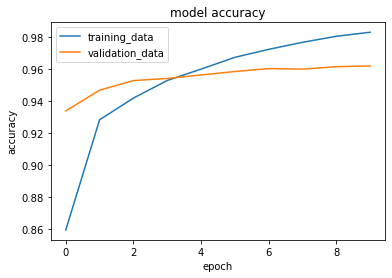

In [29]:
model = Sequential()
# first layer with input features and one hidden layer
model.add(Dense(units = 2048,
                activation = 'sigmoid',
                input_shape=(number_of_features, )))

model.add(Dense(units = unique_labels,
                activation = 'softmax'))
print(model.summary())
print()

model.compile(optimizer="sgd", 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

history = model.fit(x = X_train,
                    y = y_train,
                    batch_size= 150,
                    epochs=10,
                    verbose=0,
                    validation_split=0.1)

print()
loss, accuracy = model.evaluate(x = X_test,
                                y = y_test)

print()
model_accuracy_plot(history)
print()
print('Testing data Loss: ', round(loss, 2))
print()
print('Testing data Accuracy: ', round(accuracy, 2))

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 10000)             7850000   
_________________________________________________________________
dense_30 (Dense)             (None, 10)                100010    
Total params: 7,950,010
Trainable params: 7,950,010
Non-trainable params: 0
_________________________________________________________________
None


10000/10000 [==============================] - 3s 331us/step


Testing data Loss:  0.11

Testing data Accuracy:  0.97


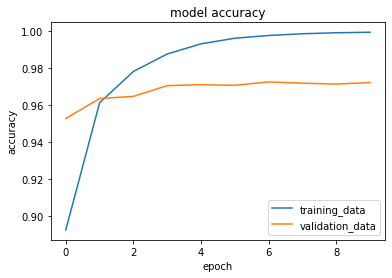

In [30]:
model = Sequential()
# first layer with input features and one hidden layer
model.add(Dense(units = 10000,
                activation = 'sigmoid',
                input_shape=(number_of_features, )))

model.add(Dense(units = unique_labels,
                activation = 'softmax'))
print(model.summary())
print()

model.compile(optimizer="sgd", 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

history = model.fit(x = X_train,
                    y = y_train,
                    batch_size= 150,
                    epochs=10,
                    verbose=0,
                    validation_split=0.1)

print()
loss, accuracy = model.evaluate(x = X_test,
                                y = y_test)

print()
model_accuracy_plot(history)
print()
print('Testing data Loss: ', round(loss, 2))
print()
print('Testing data Accuracy: ', round(accuracy, 2))

* 9000 nodes in a single hidden layer

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 9000)              7065000   
_________________________________________________________________
dense_34 (Dense)             (None, 10)                90010     
Total params: 7,155,010
Trainable params: 7,155,010
Non-trainable params: 0
_________________________________________________________________
None


10000/10000 [==============================] - 3s 317us/step


Testing data Loss:  0.11

Testing data Accuracy:  0.97


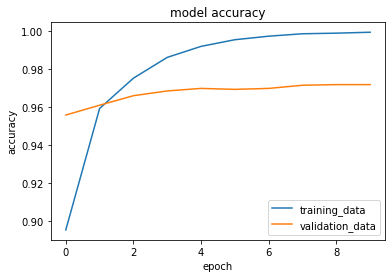

In [32]:
model = Sequential()

model.add(Dense(units = 9000,
                activation = 'sigmoid',
               input_shape = (number_of_features, )))
model.add(Dense(units = unique_labels,
                activation = 'softmax'))
print(model.summary())
print()

model.compile(optimizer="sgd", 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

history = model.fit(x = X_train,
                    y = y_train,
                    batch_size= 150,
                    epochs=10,
                    verbose=0,
                    validation_split=0.1)

print()
loss, accuracy = model.evaluate(x = X_test,
                                y = y_test)

print()
model_accuracy_plot(history)
print()
print('Testing data Loss: ', round(loss, 2))
print()
print('Testing data Accuracy: ', round(accuracy, 2))


Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 3000)              2355000   
_________________________________________________________________
dense_36 (Dense)             (None, 3000)              9003000   
_________________________________________________________________
dense_37 (Dense)             (None, 3000)              9003000   
_________________________________________________________________
dense_38 (Dense)             (None, 10)                30010     
Total params: 20,391,010
Trainable params: 20,391,010
Non-trainable params: 0
_________________________________________________________________
None


10000/10000 [==============================] - 11s 1ms/step


Testing data Loss:  0.29

Testing data Accuracy:  0.92


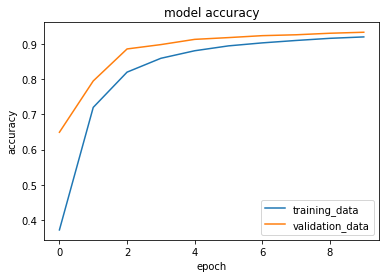

In [33]:
#  build thr artificial neural network
model = Sequential()

model.add(Dense(units = 3000,
                activation = 'sigmoid',
               input_shape = (number_of_features, )))
model.add(Dense(units = 3000,
                activation = 'sigmoid'))
model.add(Dense(units = 3000,
                activation = 'sigmoid'))
model.add(Dense(units = unique_labels,
                activation = 'softmax'))
print(model.summary())
print()

# compile the model
model.compile(optimizer="sgd", 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# train the model
history = model.fit(x = X_train,
                    y = y_train,
                    batch_size= 150,
                    epochs=10,
                    verbose=0,
                    validation_split=0.1)

print()
# evaluation of the model
loss, accuracy = model.evaluate(x = X_test,
                                y = y_test)

print()
# plot the accuracy of training and validation of model
model_accuracy_plot(history)
print()
print('Testing data Loss: ', round(loss, 2))
print()
print('Testing data Accuracy: ', round(accuracy, 2))

Well, it takes 16 minutes to train just 10 epochs, but unlike the 9k node model, it seems to continue improving rather than plateu right away. It also doesn't appear to have overfit the data. Interestingly, it's still underperforming compared to some of the simpler models, it's possible this could change if we train for long enough—but other models are doing more with significantly fewer resources... it's worth thinking about why that might be.

## Thinking About Resolution

In the case of the MNIST digits dataset, the initial input is only 28 by 28 pixels, a total of 784 data points. In the previous model we 'increased' the resolution of the each datapoint to 9,000 and 3000 values per layer respectively.

The strength of neural networks is capturing complex interactions between data points, but scaling 784 values into 9,000 or 3000 nodes makes training the network harder and makes the problem of the second layer more complex than the original problem. Obviously, we were still able to achieve decent performance this way, but consider this:

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_43 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_44 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_45 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_46 (Dense)             (None, 10)                650       
Total params: 242,762
Trainable params: 242,762
Non-trainable params: 0
_________________________________________________________________
None

Train on 54000 samples, validate on 6000 samples
Epoch 1/50
 - 2s - loss: 2.2727 - accuracy: 0.2337 - val_loss: 2.2185 - val_accuracy: 0.3897
Epoch 2/50
 - 2s - loss: 2.1758 - accuracy: 0.4653 - val_loss: 2.1188 - val_accuracy: 0.5443
Epoc

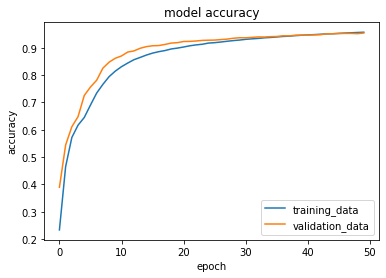

In [35]:
#  build thr artificial neural network
model = Sequential()

model.add(Dense(units = 256,
                activation = 'sigmoid',
               input_shape = (number_of_features, )))
model.add(Dense(units = 128,
                activation = 'sigmoid'))
model.add(Dense(units = 64,
                activation = 'sigmoid'))
model.add(Dense(units = unique_labels,
                activation = 'softmax'))
print(model.summary())
print()

# compile the model
model.compile(optimizer="sgd", 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# train the model
history = model.fit(x = X_train,
                    y = y_train,
                    batch_size= 150,
                    epochs=50,
                    verbose=2,
                    validation_split=0.1)

print()
# evaluation of the model
loss, accuracy = model.evaluate(x = X_test,
                                y = y_test)

print()
# plot the accuracy of training and validation of model
model_accuracy_plot(history)
print()
print('Testing data Loss: ', round(loss, 2))
print()
print('Testing data Accuracy: ', round(accuracy, 2))

By reducing the size of the problem at each layer, we make each epoch much faster. In this case, we've also improved accuracy. As in many things, overcomplication is a big problem. On MNIST, its possible to do better than 95% with a deep neural net, but to really break into the top tier (99% accuracy has been achieved) we need Convolutional Neural Networks